# Hydraulisen järjestelmän datan korrelaatioanalyysi

Tässä notebookissa analysoidaan hydraulisen järjestelmän datan piirteiden välisiä korrelaatioita ja visualisoidaan tulokset.

## 1. Kirjastojen tuonti
- pandas: Datan käsittelyyn ja analysointiin
- numpy: Numeeriseen laskentaan
- matplotlib ja seaborn: Visualisointiin
- sklearn.preprocessing: Datan skaalaukseen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.colors import LinearSegmentedColormap

# Poista sarake- ja rivirajoitukset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

## 2. Datan lataaminen

Ladataan training data, jota käytetään korrelaatioanalyysissä.

In [2]:
# Määritä tiedostojen polut
currentDir = os.path.dirname(os.path.abspath("__file__"))
dataFile = os.path.join(os.path.dirname(currentDir), 'Data', 'trainingData.csv')
outputDir = os.path.join(os.path.dirname(currentDir), 'Visualization')

# Varmista että output-kansio on olemassa
if not os.path.exists(outputDir):
    os.makedirs(outputDir)

# Lue data
print(f"Luetaan data tiedostosta: {dataFile}")
df = pd.read_csv(dataFile)

# Näytä datan perustiedot
print("\nDatan rakenne:")
print(f"- Rivejä: {len(df)}")
print(f"- Sarakkeita: {len(df.columns)}")
print("\nSarakkeet:")
for col in df.columns:
    print(f"- {col} ({df[col].dtype})")

# Näytä datan ensimmäiset rivit
df.head()

Luetaan data tiedostosta: d:\Rakentelu\Projektit\10_LED_ohjain_2313_baremetal_ML\HydraulicControlML\Data\trainingData.csv

Datan rakenne:
- Rivejä: 6946
- Sarakkeita: 9

Sarakkeet:
- pumpControl (float64)
- pressure (float64)
- state (object)
- state_numeric (int64)
- state_hose_break (bool)
- state_normal_digging (bool)
- state_normal_empty (bool)
- state_normal_full (bool)
- state_overload (bool)


,pumpControl,pressure,state,state_numeric,state_hose_break,state_normal_digging,state_normal_empty,state_normal_full,state_overload
0,0.963415,0.842227,overload,3,False,False,False,False,True
1,0.560976,0.415313,normal_digging,0,False,True,False,False,False
2,0.865854,0.018561,hose_break,4,True,False,False,False,False
3,0.585366,0.385151,normal_digging,0,False,True,False,False,False
4,0.878049,0.816705,overload,3,False,False,False,False,True


## 3. Datan tarkastelu

Tarkastellaan datan jakaumaa ja tilastollisia tunnuslukuja.

In [3]:
# Erottele numeeriset ja kategoriamuuttujat
numericCols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricalCols = df.select_dtypes(include=['object', 'bool']).columns.tolist()

print("\nNumeeriset sarakkeet:")
for col in numericCols:
    print(f"- {col}")

print("\nKategoriamuuttujat:")
for col in categoricalCols:
    print(f"- {col}")

# Näytä tilastolliset tunnusluvut numeerisille muuttujille
df[numericCols].describe()


Numeeriset sarakkeet:
- pumpControl
- pressure
- state_numeric

Kategoriamuuttujat:
- state
- state_hose_break
- state_normal_digging
- state_normal_empty
- state_normal_full
- state_overload


,pumpControl,pressure,state_numeric
count,6946.000000,6946.000000,6946.000000
mean,0.649231,0.445083,1.639937
std,0.272900,0.262614,1.471813
min,0.000000,0.000000,0.000000
25%,0.500000,0.322506,0.000000
50%,0.658537,0.406032,2.000000
75%,0.914634,0.737819,3.000000
max,1.000000,1.000000,4.000000


## 4. Luokkajakauman visualisointi

Visualisoidaan eri tilojen jakauma datassa.

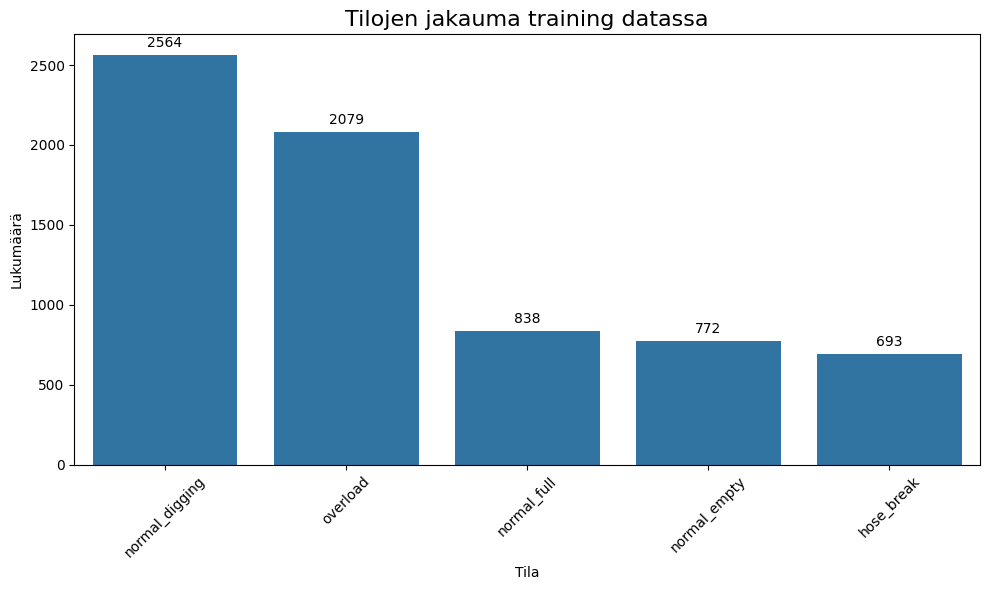

In [4]:
# Visualisoi luokkajakauma
plt.figure(figsize=(10, 6))
state_counts = df['state'].value_counts()
ax = sns.barplot(x=state_counts.index, y=state_counts.values)

# Lisää arvot pylväisiin
for i, v in enumerate(state_counts.values):
    ax.text(i, v + 50, str(v), ha='center')

plt.title('Tilojen jakauma training datassa', fontsize=16)
plt.xlabel('Tila')
plt.ylabel('Lukumäärä')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Numeeristen muuttujien korrelaatiomatriisi

Lasketaan ja visualisoidaan numeeristen muuttujien välinen korrelaatiomatriisi.


Lasketaan korrelaatiot...

Korrelaatiomatriisi:
               pumpControl  pressure  state_numeric
pumpControl       1.000000  0.748500       0.418429
pressure          0.748500  1.000000       0.159229
state_numeric     0.418429  0.159229       1.000000


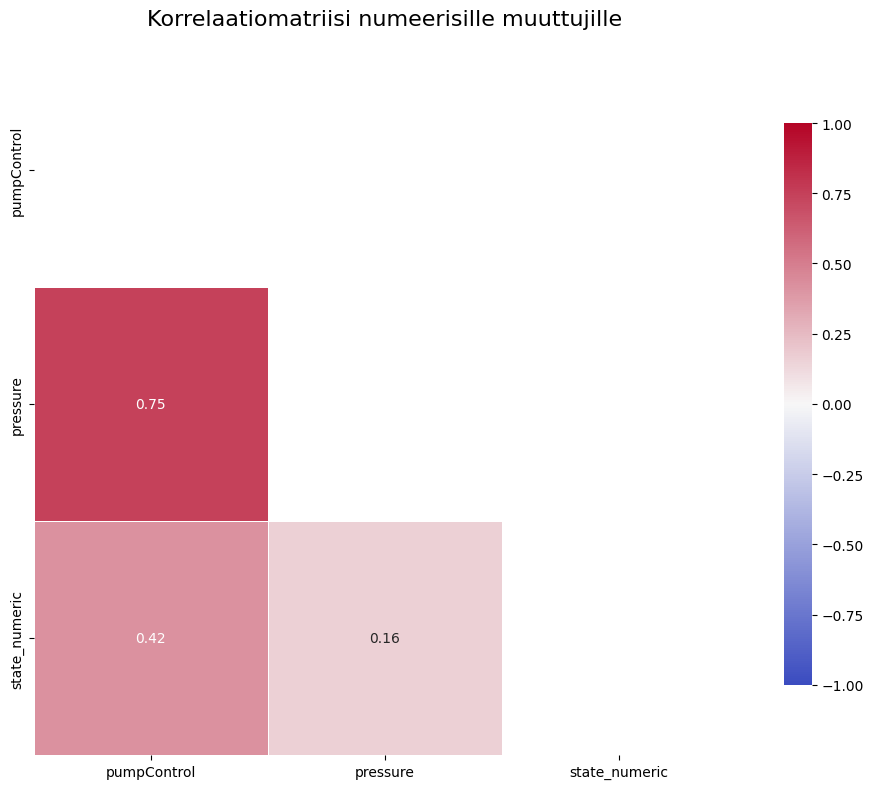


Korrelaatiomatriisikuva tallennettu: d:\Rakentelu\Projektit\10_LED_ohjain_2313_baremetal_ML\HydraulicControlML\Visualization\correlationMatrix.png


<Figure size 640x480 with 0 Axes>

In [5]:
# Luo korrelaatiomatriisi numeerisille muuttujille
print("\nLasketaan korrelaatiot...")
correlationMatrix = df[numericCols].corr()

# Tulosta korrelaatiomatriisi
print("\nKorrelaatiomatriisi:")
print(correlationMatrix)

# Luo korrelaatiomatriisikuva
plt.figure(figsize=(10, 8))

# Luo mukautettu värikartta: sininen (negatiivinen) -> valkoinen -> punainen (positiivinen)
customCmap = LinearSegmentedColormap.from_list(
    'custom_divergent',
    [(0, '#3b4cc0'), (0.5, '#f7f7f7'), (1, '#b40426')],
    N=256
)

# Piirrä heatmap
mask = np.triu(np.ones_like(correlationMatrix, dtype=bool))
heatmap = sns.heatmap(
    correlationMatrix, 
    annot=True,
    mask=mask,
    cmap=customCmap,
    vmin=-1, 
    vmax=1, 
    center=0,
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .8},
    fmt='.2f'
)

plt.title('Korrelaatiomatriisi numeerisille muuttujille', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Tallenna kuva
correlationImagePath = os.path.join(outputDir, 'correlationMatrix.png')
plt.savefig(correlationImagePath, dpi=300, bbox_inches='tight')
print(f"\nKorrelaatiomatriisikuva tallennettu: {correlationImagePath}")

## 6. Muuttujien korrelaatiot eri tilojen kanssa

Analysoidaan numeeristen muuttujien korrelaatioita eri tilojen kanssa.


Analysoidaan muuttujien korrelaatioita luokkamuuttujien kanssa...

Numeeristen muuttujien korrelaatiot luokkamuuttujien kanssa:
               state_hose_break  state_normal_digging  state_normal_empty  \
pumpControl            0.061331             -0.339325           -0.703968   
pressure              -0.522891             -0.200058           -0.487945   
state_numeric          0.533857             -0.852371            0.086513   

               state_normal_full  state_overload  
pumpControl             0.176663        0.674934  
pressure                0.079743        0.831174  
state_numeric          -0.161060        0.603997  


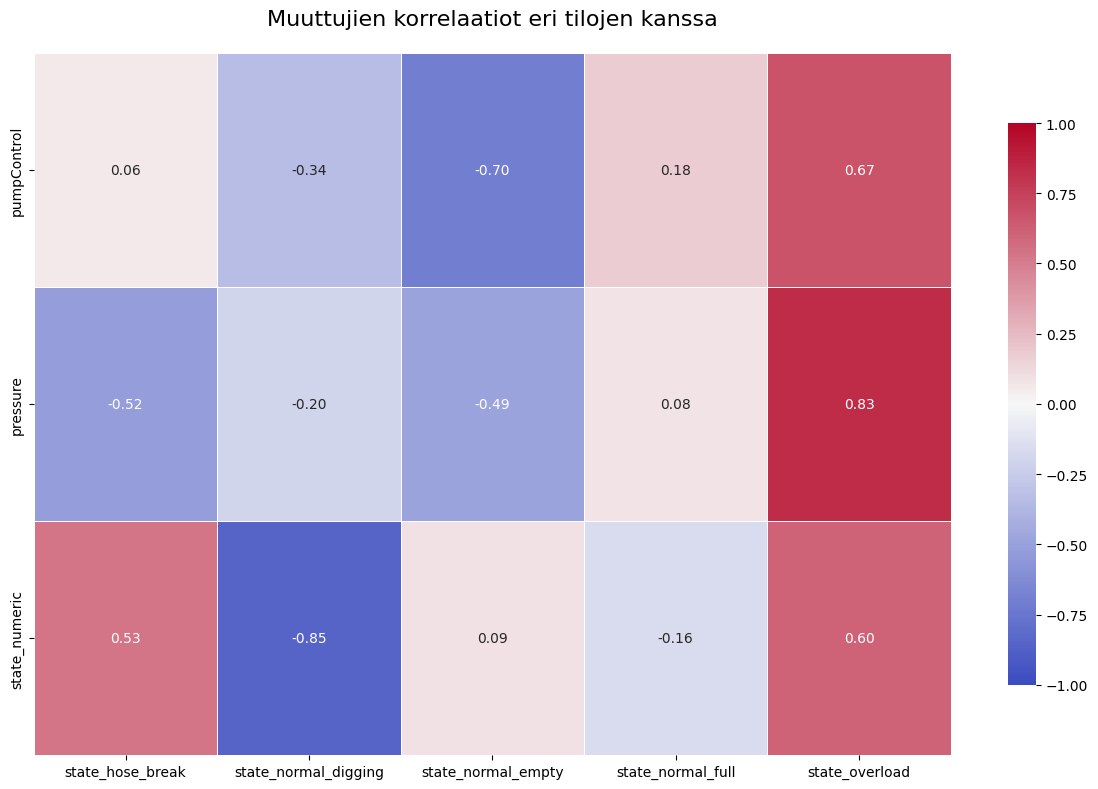


Tilojen korrelaatiokuva tallennettu: d:\Rakentelu\Projektit\10_LED_ohjain_2313_baremetal_ML\HydraulicControlML\Visualization\stateCorrelations.png


<Figure size 640x480 with 0 Axes>

In [6]:
# Tutki korrelaatioita luokkamuuttujien kanssa
print("\nAnalysoidaan muuttujien korrelaatioita luokkamuuttujien kanssa...")

# Valitse one-hot-koodatut luokkamuuttujat (ei state_numeric)
stateColumns = [col for col in df.columns if col.startswith('state_') and col != 'state_numeric']

# Luo korrelaatiomatriisi numeeristen muuttujien ja luokkamuuttujien välille
featureStateCorr = df[numericCols + stateColumns].corr()

# Suodata vain numeeriset muuttujat vs. luokkamuuttujat
featureStateCorr = featureStateCorr.loc[numericCols, stateColumns]

# Tulosta korrelaatiot
print("\nNumeeristen muuttujien korrelaatiot luokkamuuttujien kanssa:")
print(featureStateCorr)

# Visualisoi korrelaatiot
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    featureStateCorr, 
    annot=True,
    cmap=customCmap,
    vmin=-1, 
    vmax=1, 
    center=0,
    linewidths=.5, 
    cbar_kws={"shrink": .8},
    fmt='.2f'
)

plt.title('Muuttujien korrelaatiot eri tilojen kanssa', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Tallenna kuva
stateCorrelationImagePath = os.path.join(outputDir, 'stateCorrelations.png')
plt.savefig(stateCorrelationImagePath, dpi=300, bbox_inches='tight')
print(f"\nTilojen korrelaatiokuva tallennettu: {stateCorrelationImagePath}")

## 7. Scatter plot visualisointi

Visualisoidaan pumpun ohjausarvon ja paineen suhdetta eri tiloissa.


Luodaan scatter plot visualisaatio...


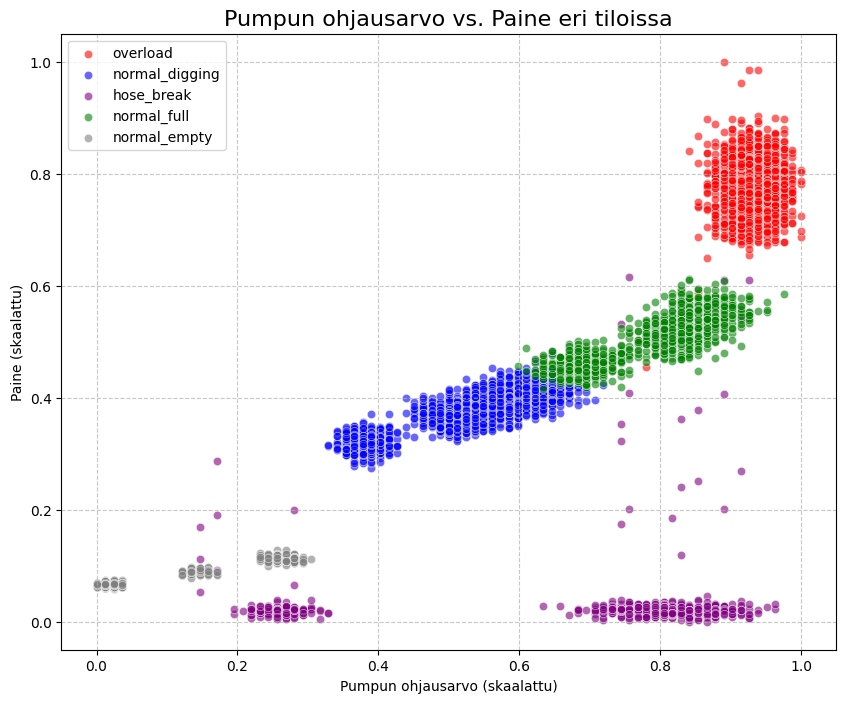


Scatter plot tallennettu: d:\Rakentelu\Projektit\10_LED_ohjain_2313_baremetal_ML\HydraulicControlML\Visualization\featureScatter.png


<Figure size 640x480 with 0 Axes>

In [7]:
# Luo scatter plot numeerisista muuttujista eri luokille
print("\nLuodaan scatter plot visualisaatio...")
plt.figure(figsize=(10, 8))

# Käytä eri värejä eri luokille
colors = {'normal_digging': 'blue', 'normal_full': 'green', 
          'normal_empty': 'gray', 'overload': 'red', 'hose_break': 'purple'}

# Piirrä scatter plot
for state in df['state'].unique():
    subset = df[df['state'] == state]
    plt.scatter(
        subset['pumpControl'], 
        subset['pressure'], 
        c=colors[state], 
        label=state, 
        alpha=0.6,
        edgecolors='w',
        linewidth=0.5
    )

plt.title('Pumpun ohjausarvo vs. Paine eri tiloissa', fontsize=16)
plt.xlabel('Pumpun ohjausarvo (skaalattu)')
plt.ylabel('Paine (skaalattu)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Tallenna kuva
scatterImagePath = os.path.join(outputDir, 'featureScatter.png')
plt.savefig(scatterImagePath, dpi=300, bbox_inches='tight')
print(f"\nScatter plot tallennettu: {scatterImagePath}")